In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate, optimize
import os

In [29]:
def get_model_measures(model, tta_condition):
    sol = model.solve(conditions={'tta_condition': tta_condition})
    return tta_condition, sol.prob_correct(), sol.mean_decision_time()
        
def plot_measures(exp_data, model_measures):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))
    
    sns.pointplot(ax=ax1, data=exp_data, x='tta_condition', y='is_turn_decision', marker='o', color='k', ls='-')
    sns.pointplot(ax=ax1, data=model_measures, x='tta_condition', y='is_turn_decision', marker='s', color='grey')
    ax1.set_ylabel('p(turn)')
    
    sns.pointplot(ax=ax2, data=exp_data[exp_data.is_turn_decision], x='tta_condition', y='RT', 
                  marker='o', color='k', ls='-', label='Experiment')
    sns.pointplot(ax=ax2, data=model_measures, x='tta_condition', y='RT', marker='s', color='grey')
    
def plot_rt_pdfs(exp_data, model_rts):
    fig, axes = plt.subplots(1,3,figsize=(10,3))

    for i, tta_condition in enumerate(exp_data.tta_condition.unique()):
        model_rts_per_tta = model_rts[model_rts.condition==tta_condition]
        axes[i].plot(model_rts_per_tta.t, model_rts_per_tta.rt_corr_pdf, label='Model')
        sns.distplot(ax=axes[i], a=exp_data[exp_data.is_turn_decision & (exp_data.tta_condition==tta_condition)].RT, 
                    label='Experiment')
        axes[i].set_xlabel('RT')
        axes[i].set_title('TTA=%.0fs' % tta_condition)
#         axes[i].get_legend().remove()
    axes[0].set_ylabel('pdf')
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
def visualize_model_fit(exp_data, model_name):
    model_results_path = os.path.join(fit_results_path, model_name)
    model_measures = pd.read_csv(os.path.join(model_results_path, 'measures.csv'))
    model_rts = pd.read_csv(os.path.join(model_results_path, 'rt_pdf.csv'))
    
    plot_measures(exp_data, model_measures)
    plt.title('Model %s, WLS=%.5f' % (model_name.replace('_', ' ').title(), model_measures.loss[0]))
    plot_rt_pdfs(exp_data, model_rts)    

In [30]:
exp_data = pd.read_csv('measures.csv', usecols=['RT', 'is_turn_decision', 'tta_condition'])

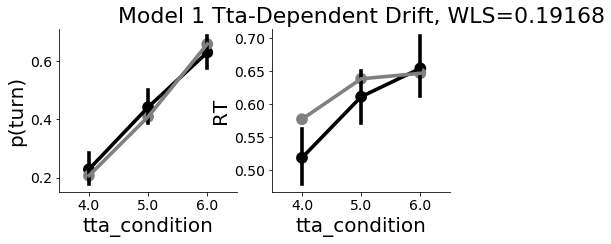

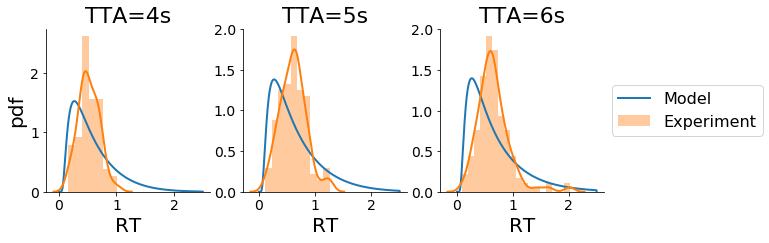

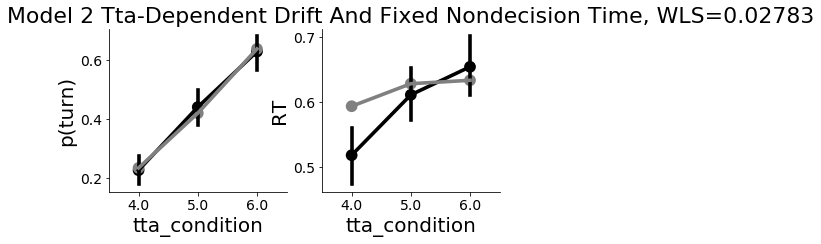

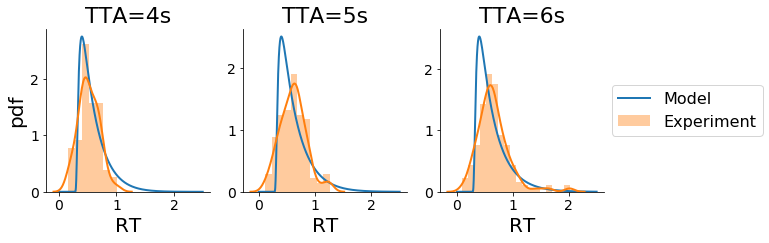

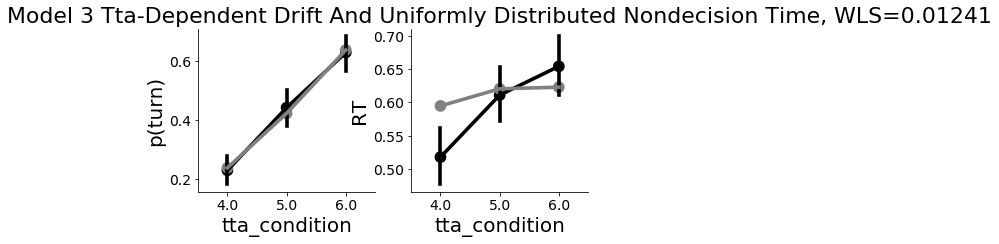

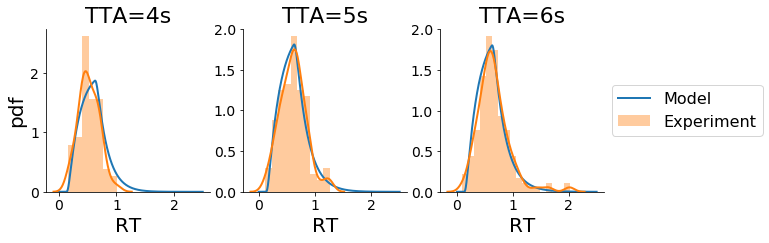

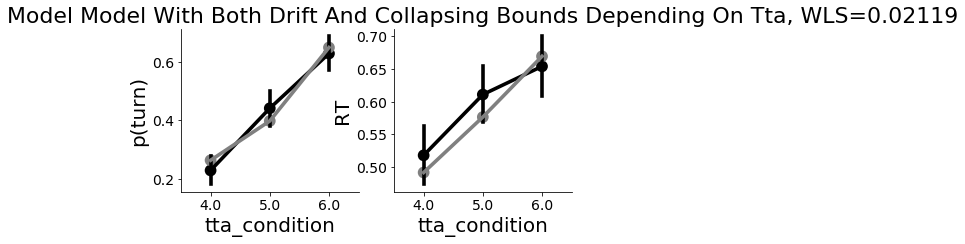

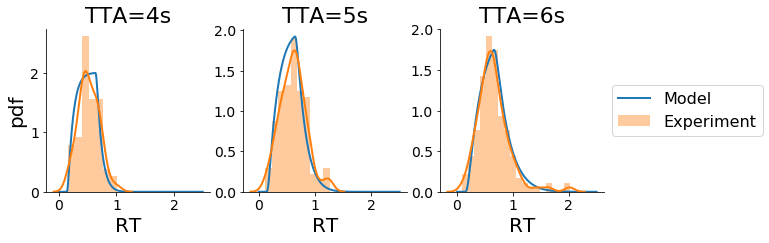

In [32]:
fit_results_path = 'model_fit_results'

for model_name in os.listdir(fit_results_path):
    visualize_model_fit(exp_data, model_name)